# Inhibitory-stabilized linear model?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from disp import set_plot

N = 128
thetas = np.linspace(0, 2*np.pi, N)

def get_cmn_p(a, p):
    """
    Circular mean from prob distr.
    
    a: angle vector of form np.arange(0, 2*np.pi, 2*np.pi/n)
    p: corresponding probabilities
    """
    return np.arctan2(p@np.sin(a), p@np.cos(a))

def make_J(N, g):
    J = np.diag(np.ones(N-1), -1)
    J[0, -1] = 1
    J *= g
    return J

In [2]:
# J = make_J(N, 1.2)
J = make_J(N, 5)
# J = make_J(N, 10)

J_Z = -0.05*np.ones((N, 1))

In [3]:
DT = .0001
TAU = .01
t = np.arange(0, 1, DT)

rs = np.nan*np.zeros((len(t), N))
rs[0, :] = np.eye(N)[0, :]

M_0 = .5
BETA = 2
phi_z = lambda r: np.exp(BETA*(np.mean(r) - M_0))
zs = np.nan*np.zeros((len(t), 1))
zs[0, :] = phi_z(rs[0, :])

for ct, t_ in enumerate(t[1:], 1):
    dr = (DT/TAU)*(-rs[ct-1, :] + J@rs[ct-1, :] + J_Z@zs[ct-1, :])
    r = rs[ct-1, :] + dr
    rs[ct, :] = np.where(r > 0, r, 0)
    
    z = phi_z(rs[ct, :])
    zs[ct, :] = [z]

ps = np.array([r/np.sum(r) for r in rs])
cmns = np.array([get_cmn_p(thetas, p) for p in ps])

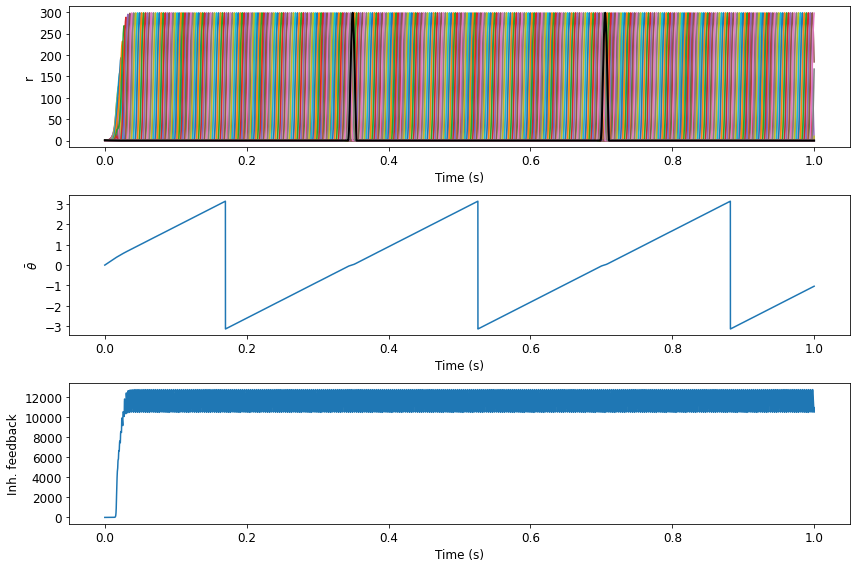

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8), tight_layout=True)
axs[0].plot(t, rs)
axs[0].plot(t, rs[:, 0], c='k', lw=2)
set_plot(axs[0], x_label='Time (s)', y_label='r')
axs[1].plot(t, cmns)
set_plot(axs[1], y_lim=(-1.1*np.pi, 1.1*np.pi), x_label='Time (s)', y_label=r'$\bar{\theta}$')
axs[2].plot(t, zs[:, 0])
set_plot(axs[2], x_label='Time (s)', y_label='Inh. feedback')